<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset: already downloaded, commented out to preserve command for learning

In [2]:
##!##wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-03-08 19:40:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-03-08 19:40:12 (13.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [155]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [87]:
df.shape

(346, 10)

### Convert to date time object 

In [158]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [44]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender', 'dayofweek',
       'weekend'],
      dtype='object')

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [159]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better: (edit: preserving command for learning)  
### Seaborn should be installed in system already, if not, need to install outside of this notebook if possible. ###

In [7]:
# notice: installing seaborn might takes a few minutes
##!##conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    seaborn-0.10.0             |             py_0         161 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0       --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0  --> 2019.11.28-py36_0 anaconda
    openssl:         1.1.1d-h7b6447c_3  --> 1.1.1-h7b6447c_0  anaconda
    seaborn:         0.9.0-pyh91

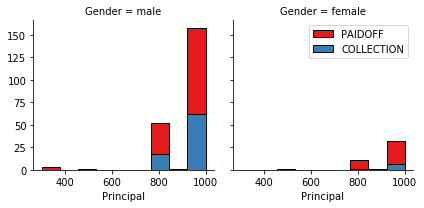

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

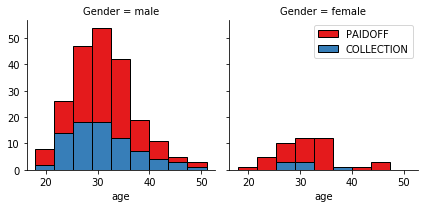

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

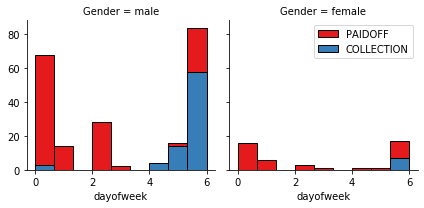

In [160]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [161]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [162]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [163]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [164]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets define feature sets, X:

In [170]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [166]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [18]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your loan_train.csv (file from above) into train and test to find the best __k__.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [66]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8181818181818182
Test set Accuracy:  0.7211538461538461


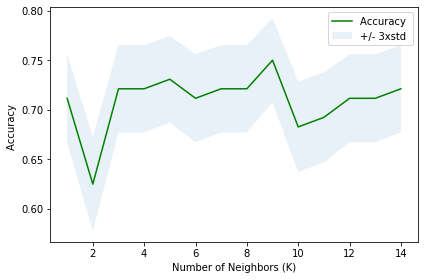

The best accuracy was with 0.75 with k= 9


In [55]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
loanstat_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanstat_tree.fit(X_train,y_train)
loanstat_tree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
predTree = loanstat_tree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
DecisionTrees's Accuracy:  0.7403846153846154


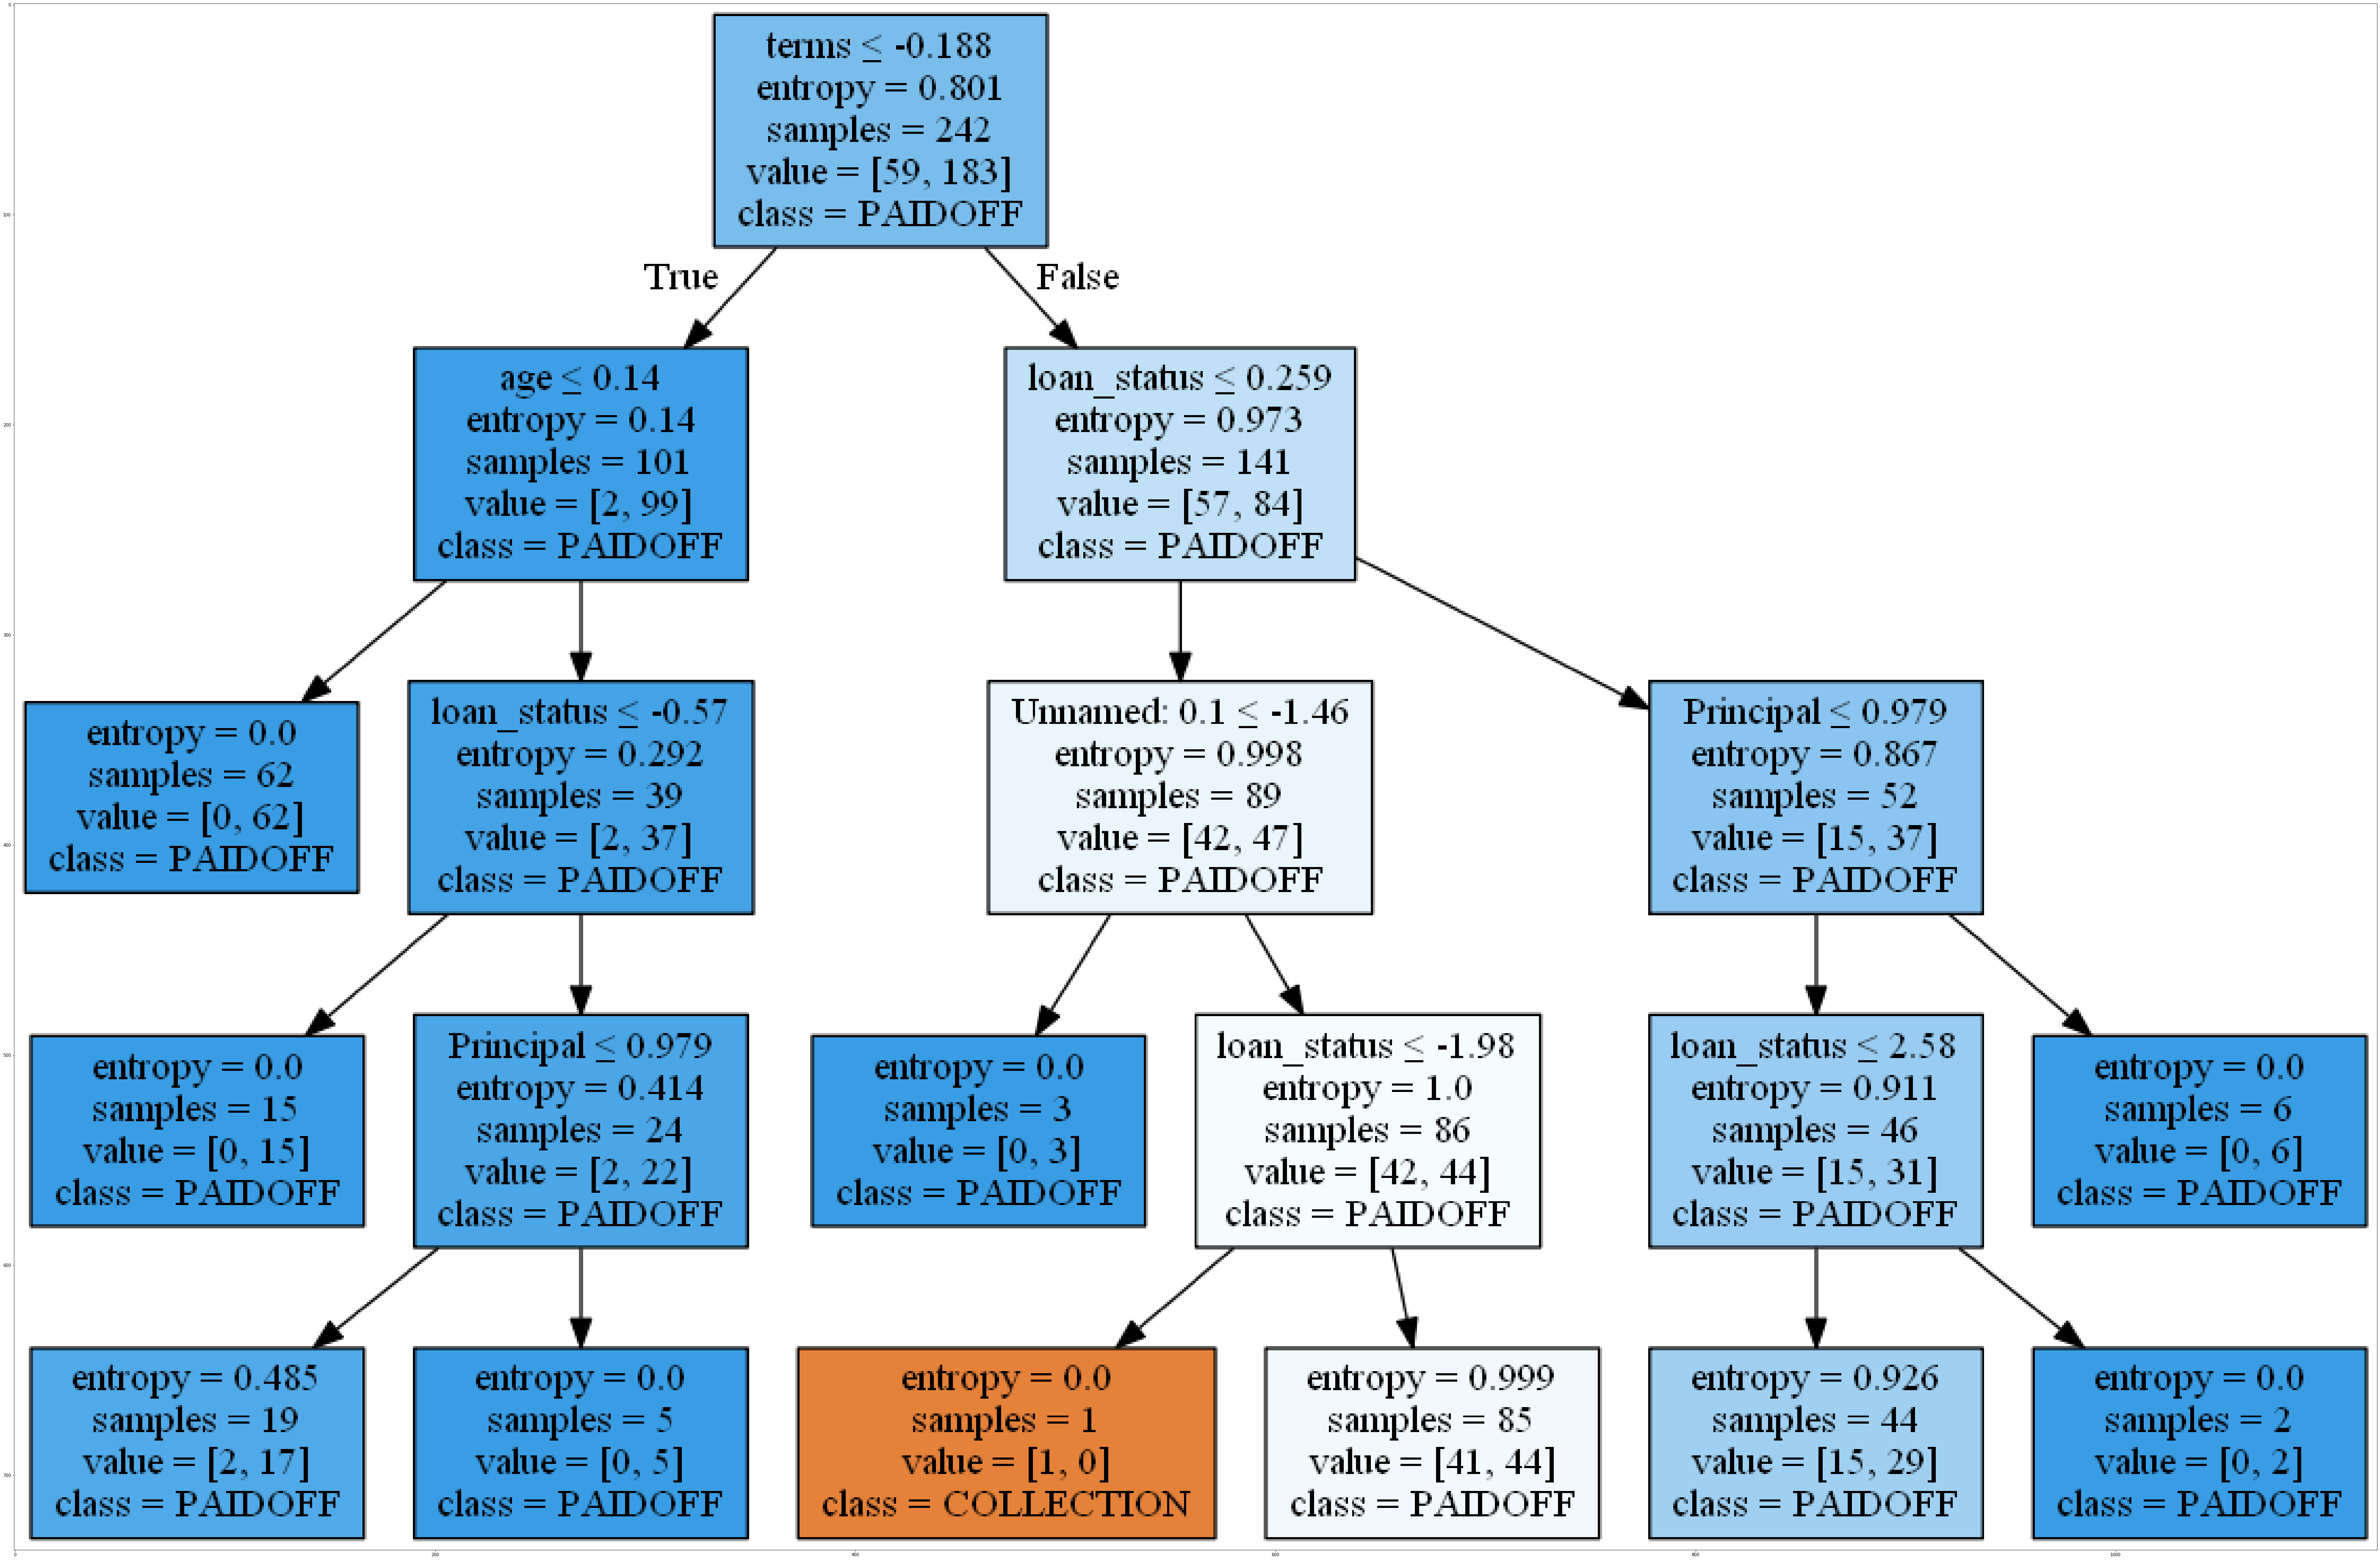

In [58]:

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "loanstatus.png"
featureNames = df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loanstat_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [262]:
from sklearn import svm
loansvm = svm.SVC(kernel='rbf')
loansvm.fit(X_train, y_train)
yhatsvm = loansvm.predict(X_test)
loansvm, yhatsvm [0:5]

(SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
       dtype=object))

precision    recall  f1-score   support

  COLLECTION       1.00      0.04      0.07        27
     PAIDOFF       0.75      1.00      0.86        77

    accuracy                           0.75       104
   macro avg       0.87      0.52      0.46       104
weighted avg       0.81      0.75      0.65       104

Confusion matrix, without normalization
[[ 1 26]
 [ 0 77]]


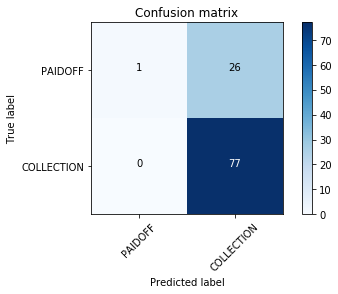

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
loanstat_matrix = confusion_matrix(y_test, yhatsvm)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatsvm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(loanstat_matrix, classes=['PAIDOFF','COLLECTION'], normalize= False,  title='Confusion matrix')

In [283]:
# Finding best value using different kernel types.  'precomputed' not included due to complex square matrix.
kernel_list = ['linear','poly','rbf','sigmoid']
list_SVMi = np.zeros(len(kernel_list))
f1_SVMi = np.zeros(len(kernel_list))

for i, k in enumerate(kernel_list):
    SVMi = svm.SVC(kernel=k)
    SVMi.fit(X_train, y_train)
    yhat_SVMi = SVMi.predict(X_test)
    list_SVMi[i] = jaccard_similarity_score(y_test, yhat_SVMi)
    f1_SVMi[i] = f1_score(y_test, yhat_SVMi, average='weighted')

np.set_printoptions(precision=9)
print( "jaccard scores: ",list_SVMi)
print( "f1 scores: ",f1_SVMi)
print( "The best accuracy: jaccard: ", list_SVMi.max(), " : f1 score: ", f1_SVMi.max()," :solver: ",kernel_list[list_SVMi.argmax()] )


jaccard scores:  [0.740384615 0.75        0.75        0.711538462]
f1 scores:  [0.629940501 0.666853933 0.651984127 0.615600691]
The best accuracy: jaccard:  0.75  : f1 score:  0.6668539325842696  :solver:  poly


# Logistic Regression

In [230]:
import pylab as pl
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhatLR[:5], yhat_prob[:5]

(array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
       dtype=object),
 array([[0.49, 0.51],
        [0.45, 0.55],
        [0.32, 0.68],
        [0.36, 0.64],
        [0.34, 0.66]]))

precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.12        27
     PAIDOFF       0.74      0.95      0.83        77

    accuracy                           0.72       104
   macro avg       0.54      0.51      0.48       104
weighted avg       0.64      0.72      0.65       104

Confusion matrix, without normalization
[[ 2 25]
 [ 4 73]]


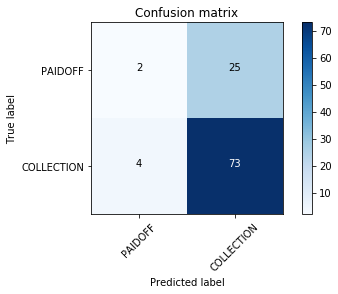

In [231]:
# Compute confusion matrix
LRloan_matrix = confusion_matrix(y_test, yhatLR)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatLR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(LRloan_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [285]:
# Find different settings:  different solver and regularization values.
solver_list = ['newton-cg','lbfgs','liblinear','sag','saga']
list_LRi = np.zeros(len(solver_list))
log_LRi = np.zeros(len(solver_list))

for i, s in enumerate(solver_list):
    LRi = LogisticRegression(C=0.01, solver=s).fit(X_train,y_train)
    yi_hatLR = LR.predict(X_test)
    yi_hat_prob = LR.predict_proba(X_test)
    list_LRi[i] = jaccard_similarity_score(y_test, yi_hatLR)
    log_LRi[i] = log_loss(y_test, yi_hat_prob)

np.set_printoptions(precision=9)
print( "jaccard scores: ",list_LRi)
print( "log loss scores: ",log_LRi)
print( "The best accuracy: jaccard: ", list_LRi.max(), " : logloss: ", log_LRi.max()," :solver: ",solver_list[list_LRi.argmax()] )

jaccard scores:  [0.721153846 0.721153846 0.721153846 0.721153846 0.721153846]
log loss scores:  [0.576223689 0.576223689 0.576223689 0.576223689 0.576223689]
The best accuracy: jaccard:  0.7211538461538461  : logloss:  0.5762236891512358  :solver:  newton-cg


# Model Evaluation using Test set

In [133]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set: file downloaded and should be in the same dir as this notebook  

In [ ]:
##!##wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation 

In [196]:
test_df = pd.read_csv('loan_test.csv')

# Conversion, summary of above, column names and data structure the same:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_feat = test_df[['Principal','terms','age','Gender','weekend']]
test_feat = pd.concat([test_feat,pd.get_dummies(test_df['education'])], axis=1)
test_feat.drop(['Master or Above'], axis = 1,inplace=True)

# Get the data for testing, X, y:
Xtest = test_feat
ytest = test_df['loan_status'].values
# Normalize:
Xnorm= preprocessing.StandardScaler().fit(Xtest).transform(Xtest)


In [291]:
# Model Prediction using test data.

# K-Nearest-Neighbor
# k value already got from the train-test above, so using value of k=9 from that result.
k_knn = 9
#Train Model and Predict, using training data with k=9.
testneigh = KNeighborsClassifier(n_neighbors = k_knn).fit(X_train,y_train)
# Now with test data:
y_knntest = testneigh.predict(Xnorm)
print("KNN Test set Accuracy: ", metrics.accuracy_score(ytest, y_knntest))

# Decision Tree
y_treetest = loanstat_tree.predict(Xnorm)
print("DecisionTrees's Test Accuracy: ", metrics.accuracy_score(ytest, y_treetest))

# SVM: poly chosen from solution above.
SVMtest = svm.SVC(kernel='poly')
SVMtest.fit(X_train, y_train)
y_svmtest = SVMtest.predict(Xnorm)
print("SVM's Test Accuracy: ", classification_report(ytest, y_svmtest))

# Logistic Regression: since all solutions are the same, using liblinear as suggested in scikit-learn manual for small datasets.
LRtest = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_LRtest = LRtest.predict(Xnorm)
y_LRtest_prob = LR.predict_proba(Xnorm)    # will be used for Log Loss
print ("Logistic Regression's Test Accuracy: ", classification_report(ytest, y_LRtest))


In [287]:
# The report in the following order:
#   KNN
#   Decision Tree
#   SVM
#   Logistic Regression

jlist = []
flist = []
llist = ['NA','NA','NA']
# For jaccard:
jlist.append(jaccard_similarity_score(ytest, y_knntest) )
jlist.append(jaccard_similarity_score(ytest, y_treetest))
jlist.append(jaccard_similarity_score(ytest, y_svmtest))
jlist.append(jaccard_similarity_score(ytest, y_LRtest))

# For F1:
flist.append(f1_score(ytest, y_knntest, average='weighted') )
flist.append(f1_score(ytest, y_treetest, average='weighted') )
flist.append(f1_score(ytest, y_svmtest, average='weighted') )
flist.append(f1_score(ytest, y_LRtest, average='weighted') )

# For Log Loss, Logistic Regression only:
llist.append(log_loss(ytest, y_LRtest_prob))


In [288]:
algo_name = ['KNN','Decision Tree','SVM','LogisticRegression']
dataML = { 'Algorithm':algo_name,'Jaccard':jlist,'F1-score':flist,'LogLoss':llist }
report = pd.DataFrame(dataML)

report


,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.666667,0.615152,NA
1,Decision Tree,0.759259,0.671764,NA
2,SVM,0.759259,0.695923,NA
3,LogisticRegression,0.740741,0.660427,0.576485


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |